In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import math
import pandas as pd
import requests
from zipfile import ZipFile
import os

### Autoupdate-Download-chrome-driver-in-selenium

In [3]:

url = 'https://chromedriver.storage.googleapis.com/LATEST_RELEASE_'
url_file = 'https://chromedriver.storage.googleapis.com/'
file_name = 'chromedriver_win32.zip'
### For Linux set ---> file_name = 'chromedriver_linux64.zip'

try:
    driver=webdriver.Chrome(os.getcwd().replace('\\','/')+'/'+'chromedriver.exe')
except:
    try:
        #get LATEST_RELEASE chromedriver
        LATEST_RELEASE=requests.get("https://chromedriver.storage.googleapis.com/LATEST_RELEASE").text.split('.')[0]
        version_response = requests.get(url + LATEST_RELEASE)
        if version_response.status_code==200:
            file = requests.get(url_file + version_response.text + '/' + file_name)
            print(f"chromedriver {LATEST_RELEASE} downloaded successfully ")
            with open(file_name, "wb") as code:
                code.write(file.content)
                # loading the temp.zip and creating a zip object
                with ZipFile(os.getcwd()+"\\"+file_name, 'r') as zObject:
                    zObject.extractall()  # Extracting all the members of the zip
                    print(f"chromedriver_win32.zip extracted successfully ")
  
            driver=webdriver.Chrome(os.getcwd().replace('\\','/')+'/'+'chromedriver.exe')
        else:
            print('status_code =',version_response.status_code," ----> ",version_response.text)
    
    except Exception as e:
        print(e)
    
    
    



<ipython-input-3-d2db3430199c>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(os.getcwd().replace('\\','/')+'/'+'chromedriver.exe')


#### Find All trip_destinations_links Site

In [25]:

trip_destinations_links=list()
driver.get('https://www.jabama.com')
trip_destinations=driver.find_elements(By.CLASS_NAME,'small-banner')      
for dest in trip_destinations:
    trip_destinations_links.append(dest.get_attribute('href'))



### get sub_link information(price , score , city_province , ...)

In [7]:
# get sub_link information(price , score , city_province , ...)
def write_to_df(sub_link):
    driver.get(sub_link)
    Title = driver.find_element(By.CSS_SELECTOR,'#__layout > div > div.pdp >\
    div > div.accommodation-pdp > div.accommodation-pdp-head.accommodation-pdp__head > div.title > h1').text
    city_province=driver.find_element(By.CLASS_NAME,'city-province').text
    price=driver.find_element(By.CLASS_NAME,'accommodation-pdp-sidebar-info-price-amount__price')\
    .text.strip('تومان ,').replace(',','')
    rating_count=driver.find_element(By.CLASS_NAME,'rating-box__count').text.strip('()')
    score=driver.find_element(By.CLASS_NAME,'rating-box__score').text
    host = driver.find_element(By.CSS_SELECTOR,'#__layout > div > div.pdp > div > div.accommodation-pdp >\
    div.accommodation-pdp-content > div.accommodation-pdp-content__main > div.pdp-host-info > div > p').text\
    .replace('به میزبانی','')

   
    return {'Title':Title,'city_province':city_province,'price':int(price),'rating_count':int(rating_count),
            'score':float(score),'host':host,'sub_link':sub_link}
    
    

### iterate through pages

In [9]:


jabama_df=pd.DataFrame(columns=['Title','city_province','price','rating_count','score','host','sub_link'])
for link in trip_destinations_links:
    driver.get(link)
    total_rows=driver.find_element(By.XPATH,'//*[@id="__layout"]/div/div[1]/div[2]/main/div/div[3]/div').get_attribute('total')
    print(link , total_rows)
    for page_number in range(1 ,  math.ceil(int(total_rows) / 16)+1 ):  
        try:
            driver.get('{}?page-number={}'.format(link,page_number))
            product_cards=driver.find_elements(By.CLASS_NAME,'product-card')
            sub_links=[card.get_attribute("href") for card in product_cards ]
            for sub_link in sub_links:
                print('page {}'.format(page_number),sub_link)
                jabama_df=jabama_df.append( write_to_df(sub_link) ,ignore_index = True)
                
        except Exception as e :
            continue
        

            
                
            

https://www.jabama.com/city-ramsar 1051
page 1 https://www.jabama.com/stay/cottage-343980
page 1 https://www.jabama.com/stay/suite-105472
page 1 https://www.jabama.com/stay/ecotourism-325133
page 1 https://www.jabama.com/stay/ecotourism-358231
page 1 https://www.jabama.com/stay/suite-105734
page 1 https://www.jabama.com/stay/suite-104896
page 1 https://www.jabama.com/stay/complex-421907
page 1 https://www.jabama.com/stay/villa-105485
page 1 https://www.jabama.com/stay/ecotourism-354844
page 1 https://www.jabama.com/stay/ecotourism-325673
page 1 https://www.jabama.com/stay/ecotourism-325134
page 1 https://www.jabama.com/stay/apartment-350078
page 1 https://www.jabama.com/stay/ecotourism-102205
page 1 https://www.jabama.com/stay/complex-81050
page 2 https://www.jabama.com/stay/ecotourism-325132
page 2 https://www.jabama.com/stay/suite-105561
page 2 https://www.jabama.com/stay/villa-107298
page 2 https://www.jabama.com/stay/complex-421902
page 2 https://www.jabama.com/stay/ecotourism-4186

page 11 https://www.jabama.com/stay/villa-365986
page 11 https://www.jabama.com/stay/villa-335646
page 11 https://www.jabama.com/stay/apartment-345087
page 11 https://www.jabama.com/stay/villa-360357
page 11 https://www.jabama.com/stay/villa-422049
page 11 https://www.jabama.com/stay/villa-369810
page 11 https://www.jabama.com/stay/apartment-377794
page 12 https://www.jabama.com/stay/villa-375382
page 12 https://www.jabama.com/stay/villa-388772
page 12 https://www.jabama.com/stay/traditional-372420
page 12 https://www.jabama.com/stay/apartment-378594
page 12 https://www.jabama.com/stay/suite-413781
page 12 https://www.jabama.com/stay/villa-386742
page 12 https://www.jabama.com/stay/villa-367780
page 12 https://www.jabama.com/stay/villa-391207
page 12 https://www.jabama.com/stay/villa-366970
page 12 https://www.jabama.com/stay/villa-363015
page 12 https://www.jabama.com/stay/apartment-386868
page 12 https://www.jabama.com/stay/cottage-109863
page 12 https://www.jabama.com/stay/villa-375

page 43 https://www.jabama.com/stay/villa-104804
page 44 https://www.jabama.com/stay/suite-331420
page 44 https://www.jabama.com/stay/villa-103951
page 44 https://www.jabama.com/stay/villa-412439
page 44 https://www.jabama.com/stay/villa-361329
page 44 https://www.jabama.com/stay/villa-340977
page 44 https://www.jabama.com/stay/villa-341099
page 44 https://www.jabama.com/stay/villa-399902
page 44 https://www.jabama.com/stay/suite-372800
page 44 https://www.jabama.com/stay/suite-105548
page 44 https://www.jabama.com/stay/suite-331502
page 44 https://www.jabama.com/stay/villa-362651
page 44 https://www.jabama.com/stay/cottage-381377
page 44 https://www.jabama.com/stay/villa-349306
page 44 https://www.jabama.com/stay/villa-391807
page 44 https://www.jabama.com/stay/ecotourism-371168
page 44 https://www.jabama.com/stay/villa-383563
page 45 https://www.jabama.com/stay/suite-105425
page 45 https://www.jabama.com/stay/ecotourism-339921
page 45 https://www.jabama.com/stay/suite-369864
page 45 

page 65 https://www.jabama.com/stay/apartment-109503
page 65 https://www.jabama.com/stay/suite-370806
page 65 https://www.jabama.com/stay/villa-382573
page 65 https://www.jabama.com/stay/cottage-433178
page 65 https://www.jabama.com/stay/villa-382569
page 65 https://www.jabama.com/stay/apartment-106645
page 65 https://www.jabama.com/stay/suite-105735
page 65 https://www.jabama.com/stay/villa-369408
page 65 https://www.jabama.com/stay/villa-403445
page 66 https://www.jabama.com/stay/villa-365676
page 66 https://www.jabama.com/stay/apartment-431956
page 66 https://www.jabama.com/stay/villa-377266
page 66 https://www.jabama.com/stay/cottage-379696
page 66 https://www.jabama.com/stay/complex-407164
page 66 https://www.jabama.com/stay/suite-388160
page 66 https://www.jabama.com/stay/suite-106703
page 66 https://www.jabama.com/stay/villa-367732
page 66 https://www.jabama.com/stay/villa-382519
page 66 https://www.jabama.com/stay/suite-401166
https://www.jabama.com/city-masal 424
page 1 https:

page 19 https://www.jabama.com/stay/villa-341841
page 19 https://www.jabama.com/stay/villa-369210
page 19 https://www.jabama.com/stay/villa-371952
page 19 https://www.jabama.com/stay/villa-335836
page 19 https://www.jabama.com/stay/villa-380677
page 19 https://www.jabama.com/stay/suite-369178
page 19 https://www.jabama.com/stay/villa-371014
page 19 https://www.jabama.com/stay/villa-371416
page 19 https://www.jabama.com/stay/villa-103609
page 19 https://www.jabama.com/stay/villa-392309
page 20 https://www.jabama.com/stay/villa-103609
page 20 https://www.jabama.com/stay/villa-341917
page 20 https://www.jabama.com/stay/villa-417686
page 20 https://www.jabama.com/stay/villa-379372
page 20 https://www.jabama.com/stay/villa-391547
page 20 https://www.jabama.com/stay/villa-365318
page 20 https://www.jabama.com/stay/villa-109906
page 20 https://www.jabama.com/stay/villa-359027
page 20 https://www.jabama.com/stay/villa-107176
page 20 https://www.jabama.com/stay/complex-328444
page 20 https://ww

page 5 https://www.jabama.com/stay/apartment-419992
page 5 https://www.jabama.com/stay/apartment-393981
page 5 https://www.jabama.com/stay/apartment-389893
page 5 https://www.jabama.com/stay/apartment-323832
page 5 https://www.jabama.com/stay/apartment-355598
page 5 https://www.jabama.com/stay/apartment-369646
page 5 https://www.jabama.com/stay/suite-323840
page 5 https://www.jabama.com/stay/villa-338997
page 5 https://www.jabama.com/stay/apartment-353850
page 5 https://www.jabama.com/stay/apartment-403037
page 5 https://www.jabama.com/stay/apartment-403979
page 5 https://www.jabama.com/stay/apartment-408950
page 5 https://www.jabama.com/stay/complex-81238
page 6 https://www.jabama.com/stay/apartment-360395
page 6 https://www.jabama.com/stay/apartment-410097
page 6 https://www.jabama.com/stay/apartment-356020
page 6 https://www.jabama.com/stay/apartment-360807
page 6 https://www.jabama.com/stay/apartment-108900
page 6 https://www.jabama.com/stay/apartment-326891
page 6 https://www.jaba

page 4 https://www.jabama.com/stay/complex-359258
page 5 https://www.jabama.com/stay/complex-370678
page 5 https://www.jabama.com/stay/villa-354820
page 5 https://www.jabama.com/stay/apartment-344326
page 5 https://www.jabama.com/stay/complex-384257
page 5 https://www.jabama.com/stay/villa-407074
page 5 https://www.jabama.com/stay/apartment-384219
page 5 https://www.jabama.com/stay/ecotourism-332166
page 5 https://www.jabama.com/stay/suite-358629
page 5 https://www.jabama.com/stay/villa-106887
page 5 https://www.jabama.com/stay/complex-414459
page 5 https://www.jabama.com/stay/villa-369168
page 5 https://www.jabama.com/stay/ecotourism-332157
page 5 https://www.jabama.com/stay/complex-384238
page 5 https://www.jabama.com/stay/suite-330583
page 5 https://www.jabama.com/stay/villa-104788
page 5 https://www.jabama.com/stay/villa-394067
page 6 https://www.jabama.com/stay/suite-330733
page 7 https://www.jabama.com/stay/villa-352305
page 7 https://www.jabama.com/stay/villa-411037
page 7 https

page 2 https://www.jabama.com/stay/ecotourism-371227
page 3 https://www.jabama.com/stay/ecotourism-331339
page 3 https://www.jabama.com/stay/villa-326601
page 3 https://www.jabama.com/stay/villa-376553
page 3 https://www.jabama.com/stay/cottage-109051
page 3 https://www.jabama.com/stay/ecotourism-349586
page 3 https://www.jabama.com/stay/ecotourism-347278
page 3 https://www.jabama.com/stay/ecotourism-352865
page 3 https://www.jabama.com/stay/ecotourism-331333
page 3 https://www.jabama.com/stay/ecotourism-347277
page 3 https://www.jabama.com/stay/traditional-374252
page 3 https://www.jabama.com/stay/ecotourism-331344
page 3 https://www.jabama.com/stay/traditional-374250
page 3 https://www.jabama.com/stay/ecotourism-347276
page 3 https://www.jabama.com/stay/villa-105428
page 3 https://www.jabama.com/stay/villa-105242
page 3 https://www.jabama.com/stay/ecotourism-371226
page 4 https://www.jabama.com/stay/ecotourism-349587
page 4 https://www.jabama.com/stay/complex-327026
page 4 https://ww

page 18 https://www.jabama.com/stay/apartment-361133
page 18 https://www.jabama.com/stay/apartment-393679
page 18 https://www.jabama.com/stay/villa-381697
page 18 https://www.jabama.com/stay/villa-103675
page 18 https://www.jabama.com/stay/suite-325789
page 18 https://www.jabama.com/stay/apartment-325329
page 18 https://www.jabama.com/stay/villa-411177
page 19 https://www.jabama.com/stay/apartment-390109
page 19 https://www.jabama.com/stay/apartment-375462
page 19 https://www.jabama.com/stay/villa-109719
page 19 https://www.jabama.com/stay/villa-350844
page 19 https://www.jabama.com/stay/suite-105796
page 19 https://www.jabama.com/stay/suite-351334
page 19 https://www.jabama.com/stay/suite-354908
https://www.jabama.com/city-tehran 996
page 1 https://www.jabama.com/stay/apartment-394265
page 1 https://www.jabama.com/stay/apartment-393455
page 1 https://www.jabama.com/stay/apartment-401810
page 1 https://www.jabama.com/stay/apartment-335332
page 1 https://www.jabama.com/stay/apartment-37

page 11 https://www.jabama.com/stay/inn-372012
page 11 https://www.jabama.com/stay/apartment-335034
page 11 https://www.jabama.com/stay/apartment-397074
page 11 https://www.jabama.com/stay/hostel-340323
page 11 https://www.jabama.com/stay/apartment-354954
page 12 https://www.jabama.com/stay/apartment-396124
page 12 https://www.jabama.com/stay/apartment-352829
page 12 https://www.jabama.com/stay/apartment-385545
page 12 https://www.jabama.com/stay/apartment-337225
page 12 https://www.jabama.com/stay/apartment-337215
page 12 https://www.jabama.com/stay/hostel-84341
page 12 https://www.jabama.com/stay/apartment-337227
page 12 https://www.jabama.com/stay/inn-408974
page 12 https://www.jabama.com/stay/hostel-84375
page 12 https://www.jabama.com/stay/apartment-346075
page 12 https://www.jabama.com/stay/apartment-403851
page 12 https://www.jabama.com/stay/apartment-332854
page 12 https://www.jabama.com/stay/apartment-353748
page 12 https://www.jabama.com/stay/apartment-392801
page 12 https://

page 40 https://www.jabama.com/stay/apartment-362027
page 40 https://www.jabama.com/stay/apartment-344492
page 40 https://www.jabama.com/stay/apartment-402092
page 40 https://www.jabama.com/stay/apartment-378776
page 40 https://www.jabama.com/stay/apartment-354960
page 40 https://www.jabama.com/stay/apartment-401808
page 40 https://www.jabama.com/stay/apartment-406734
page 40 https://www.jabama.com/stay/apartment-329869
page 40 https://www.jabama.com/stay/apartment-104031
page 40 https://www.jabama.com/stay/apartment-344102
page 40 https://www.jabama.com/stay/apartment-359071
page 40 https://www.jabama.com/stay/hostel-84376
page 40 https://www.jabama.com/stay/apartment-382621
page 40 https://www.jabama.com/stay/apartment-102506
page 41 https://www.jabama.com/stay/apartment-410887
page 41 https://www.jabama.com/stay/apartment-344080
page 41 https://www.jabama.com/stay/apartment-354972
page 41 https://www.jabama.com/stay/apartment-103012
page 41 https://www.jabama.com/stay/apartment-3970

page 50 https://www.jabama.com/stay/apartment-336054
page 50 https://www.jabama.com/stay/apartment-376026
page 50 https://www.jabama.com/stay/apartment-102488
page 50 https://www.jabama.com/stay/villa-403189
page 51 https://www.jabama.com/stay/apartment-350164
page 51 https://www.jabama.com/stay/apartment-417858
page 51 https://www.jabama.com/stay/apartment-358031
page 51 https://www.jabama.com/stay/apartment-388592
page 51 https://www.jabama.com/stay/apartment-412081
page 51 https://www.jabama.com/stay/villa-401750
page 51 https://www.jabama.com/stay/inn-353438
page 51 https://www.jabama.com/stay/apartment-384709
page 51 https://www.jabama.com/stay/apartment-359735
page 51 https://www.jabama.com/stay/apartment-344548
page 51 https://www.jabama.com/stay/apartment-403899
page 51 https://www.jabama.com/stay/suite-355010
page 51 https://www.jabama.com/stay/apartment-381663
page 51 https://www.jabama.com/stay/apartment-358769
page 51 https://www.jabama.com/stay/apartment-371954
page 51 htt

page 63 https://www.jabama.com/stay/apartment-335342
page 63 https://www.jabama.com/stay/suite-331784
page 63 https://www.jabama.com/stay/apartment-374056
https://www.jabama.com/city-nowshahr 329
page 1 https://www.jabama.com/stay/villa-357565
page 1 https://www.jabama.com/stay/apartment-327151
page 1 https://www.jabama.com/stay/suite-349412
page 1 https://www.jabama.com/stay/villa-347796
page 1 https://www.jabama.com/stay/suite-372332
page 2 https://www.jabama.com/stay/apartment-363517
page 2 https://www.jabama.com/stay/cottage-351220
page 2 https://www.jabama.com/stay/suite-108494
page 3 https://www.jabama.com/stay/villa-352813
page 3 https://www.jabama.com/stay/suite-109467
page 3 https://www.jabama.com/stay/apartment-375324
page 3 https://www.jabama.com/stay/apartment-372986
page 3 https://www.jabama.com/stay/villa-390911
page 3 https://www.jabama.com/stay/apartment-329751
page 3 https://www.jabama.com/stay/villa-357571
page 3 https://www.jabama.com/stay/apartment-341063
page 3 htt

page 3 https://www.jabama.com/stay/apartment-383155
page 3 https://www.jabama.com/stay/suite-363485
page 4 https://www.jabama.com/stay/apartment-403541
page 4 https://www.jabama.com/stay/villa-359189
page 4 https://www.jabama.com/stay/suite-106297
page 4 https://www.jabama.com/stay/apartment-357525
page 4 https://www.jabama.com/stay/suite-426459
page 4 https://www.jabama.com/stay/villa-379010
page 4 https://www.jabama.com/stay/apartment-373758
page 4 https://www.jabama.com/stay/apartment-434405
page 4 https://www.jabama.com/stay/villa-396020
page 4 https://www.jabama.com/stay/suite-398190
page 4 https://www.jabama.com/stay/villa-103414
page 4 https://www.jabama.com/stay/villa-106378
page 4 https://www.jabama.com/stay/apartment-417778
page 4 https://www.jabama.com/stay/apartment-417442
page 4 https://www.jabama.com/stay/villa-412555
page 4 https://www.jabama.com/stay/villa-415621
page 5 https://www.jabama.com/stay/villa-104125
page 5 https://www.jabama.com/stay/suite-106866
page 5 https

page 5 https://www.jabama.com/stay/villa-103059
page 5 https://www.jabama.com/stay/villa-103713
page 5 https://www.jabama.com/stay/apartment-380489
page 5 https://www.jabama.com/stay/villa-104079
page 5 https://www.jabama.com/stay/villa-366582
page 5 https://www.jabama.com/stay/villa-342482
page 5 https://www.jabama.com/stay/villa-340883
page 5 https://www.jabama.com/stay/suite-109950
page 5 https://www.jabama.com/stay/complex-357327
page 6 https://www.jabama.com/stay/suite-106044
page 6 https://www.jabama.com/stay/suite-387010
page 7 https://www.jabama.com/stay/villa-428641
page 8 https://www.jabama.com/stay/suite-415139
page 9 https://www.jabama.com/stay/traditional-389365
page 9 https://www.jabama.com/stay/villa-373818
page 10 https://www.jabama.com/stay/villa-396670
page 10 https://www.jabama.com/stay/apartment-400226
page 10 https://www.jabama.com/stay/villa-435641
page 11 https://www.jabama.com/stay/villa-437765
page 12 https://www.jabama.com/stay/villa-387210
page 12 https://www

https://www.jabama.com/stays-gombroon-qeshm 6
page 1 https://www.jabama.com/stay/ecotourism-412098
page 1 https://www.jabama.com/stay/ecotourism-412102
https://www.jabama.com/stays-dorbaluch-chabahar 5
page 1 https://www.jabama.com/stay/ecotourism-357110
https://www.jabama.com/stays-takhere-qeshm 3
page 1 https://www.jabama.com/stay/ecotourism-390340
https://www.jabama.com/stays-delhamid-qeshm 3
page 1 https://www.jabama.com/stay/ecotourism-410369
https://www.jabama.com/stays-aazh-chabahar 4
page 1 https://www.jabama.com/stay/ecotourism-328702
page 1 https://www.jabama.com/stay/ecotourism-328704
page 1 https://www.jabama.com/stay/ecotourism-328701
page 1 https://www.jabama.com/stay/ecotourism-328703
https://www.jabama.com/stays-khane-khorshid-hormoz 3
page 1 https://www.jabama.com/stay/ecotourism-401190
page 1 https://www.jabama.com/stay/ecotourism-401188
page 1 https://www.jabama.com/stay/ecotourism-401189
https://www.jabama.com/stays-nakhle-nakhoda 2
page 1 https://www.jabama.com/sta

https://www.jabama.com/stays-pasin-shiraz 5
page 1 https://www.jabama.com/stay/traditional-92061
page 1 https://www.jabama.com/stay/traditional-92062
page 1 https://www.jabama.com/stay/traditional-92059
page 1 https://www.jabama.com/stay/traditional-92060
page 1 https://www.jabama.com/stay/traditional-92058
https://www.jabama.com/stays-boutique-shahrzad-yazd 4
page 1 https://www.jabama.com/stay/traditional-91451
page 1 https://www.jabama.com/stay/traditional-91435
page 1 https://www.jabama.com/stay/traditional-91444
page 1 https://www.jabama.com/stay/traditional-91440
https://www.jabama.com/stays-emarate_ghajarieh-shiraz 8
page 1 https://www.jabama.com/stay/traditional-88939
page 1 https://www.jabama.com/stay/traditional-88942
page 1 https://www.jabama.com/stay/traditional-88954
page 1 https://www.jabama.com/stay/traditional-88949
page 1 https://www.jabama.com/stay/traditional-88930
page 1 https://www.jabama.com/stay/traditional-88940
page 1 https://www.jabama.com/stay/traditional-8893

page 8 https://www.jabama.com/stay/suite-393675
page 8 https://www.jabama.com/stay/traditional-92656
page 8 https://www.jabama.com/stay/traditional-85423
page 8 https://www.jabama.com/stay/suite-326343
page 8 https://www.jabama.com/stay/traditional-367911
page 9 https://www.jabama.com/stay/traditional-423285
page 10 https://www.jabama.com/stay/traditional-423286
page 11 https://www.jabama.com/stay/traditional-360965
page 12 https://www.jabama.com/stay/ecotourism-332672
page 13 https://www.jabama.com/stay/traditional-435376
page 14 https://www.jabama.com/stay/traditional-402137
page 15 https://www.jabama.com/stay/traditional-93583
page 15 https://www.jabama.com/stay/ecotourism-93204
page 15 https://www.jabama.com/stay/ecotourism-93197
page 15 https://www.jabama.com/stay/traditional-93578
page 15 https://www.jabama.com/stay/ecotourism-93200
page 15 https://www.jabama.com/stay/traditional-84875
page 15 https://www.jabama.com/stay/traditional-84871
page 15 https://www.jabama.com/stay/tradi

page 4 https://www.jabama.com/stay/apartment-379642
page 4 https://www.jabama.com/stay/ecotourism-338243
page 5 https://www.jabama.com/stay/traditional-359363
page 5 https://www.jabama.com/stay/ecotourism-339394
page 5 https://www.jabama.com/stay/apartment-326107
page 5 https://www.jabama.com/stay/traditional-385674
page 5 https://www.jabama.com/stay/apartment-419256
page 6 https://www.jabama.com/stay/traditional-385672
page 6 https://www.jabama.com/stay/traditional-409785
page 6 https://www.jabama.com/stay/ecotourism-336532
page 6 https://www.jabama.com/stay/traditional-341881
page 6 https://www.jabama.com/stay/complex-372123
page 6 https://www.jabama.com/stay/suite-430069
page 6 https://www.jabama.com/stay/traditional-357799
page 6 https://www.jabama.com/stay/ecotourism-424655
page 6 https://www.jabama.com/stay/apartment-411879
page 6 https://www.jabama.com/stay/villa-388126
page 6 https://www.jabama.com/stay/apartment-422621
page 6 https://www.jabama.com/stay/hostel-418168
page 6 ht

page 25 https://www.jabama.com/stay/apartment-108978
page 25 https://www.jabama.com/stay/apartment-420274
page 26 https://www.jabama.com/stay/suite-340293
page 26 https://www.jabama.com/stay/complex-372111
page 26 https://www.jabama.com/stay/traditional-357795
page 26 https://www.jabama.com/stay/apartment-104497
page 26 https://www.jabama.com/stay/ecotourism-339391
page 26 https://www.jabama.com/stay/traditional-91475
page 26 https://www.jabama.com/stay/complex-372110
page 26 https://www.jabama.com/stay/apartment-351949
page 26 https://www.jabama.com/stay/ecotourism-339392
page 26 https://www.jabama.com/stay/traditional-407526
page 27 https://www.jabama.com/stay/apartment-428563
page 27 https://www.jabama.com/stay/apartment-336908
page 27 https://www.jabama.com/stay/traditional-357796
page 27 https://www.jabama.com/stay/ecotourism-336496
page 27 https://www.jabama.com/stay/apartment-104474
page 27 https://www.jabama.com/stay/apartment-351943
page 27 https://www.jabama.com/stay/villa-42

page 5 https://www.jabama.com/stay/traditional-414611
page 5 https://www.jabama.com/stay/apartment-103922
page 5 https://www.jabama.com/stay/suite-414381
page 5 https://www.jabama.com/stay/ecotourism-375441
page 6 https://www.jabama.com/stay/ecotourism-375441
page 6 https://www.jabama.com/stay/traditional-419779
page 6 https://www.jabama.com/stay/ecotourism-419146
page 7 https://www.jabama.com/stay/apartment-109295
page 7 https://www.jabama.com/stay/traditional-93159
page 7 https://www.jabama.com/stay/ecotourism-426189
page 7 https://www.jabama.com/stay/complex-363169
page 7 https://www.jabama.com/stay/ecotourism-331360
page 7 https://www.jabama.com/stay/traditional-427407
page 7 https://www.jabama.com/stay/traditional-333256
page 7 https://www.jabama.com/stay/complex-93245
page 7 https://www.jabama.com/stay/ecotourism-353410
page 7 https://www.jabama.com/stay/complex-93250
page 7 https://www.jabama.com/stay/apartment-343616
page 7 https://www.jabama.com/stay/ecotourism-423756
page 7 h

page 12 https://www.jabama.com/stay/apartment-414496
page 12 https://www.jabama.com/stay/apartment-414277
page 12 https://www.jabama.com/stay/apartment-416884
page 12 https://www.jabama.com/stay/apartment-415119
page 12 https://www.jabama.com/stay/traditional-416227
page 13 https://www.jabama.com/stay/traditional-348154
page 14 https://www.jabama.com/stay/apartment-414490
page 14 https://www.jabama.com/stay/apartment-416304
page 15 https://www.jabama.com/stay/apartment-410857
page 16 https://www.jabama.com/stay/traditional-418242
page 17 https://www.jabama.com/stay/apartment-350524
page 18 https://www.jabama.com/stay/apartment-419726
page 18 https://www.jabama.com/stay/apartment-418188
page 18 https://www.jabama.com/stay/apartment-417886
page 19 https://www.jabama.com/stay/apartment-424773
page 19 https://www.jabama.com/stay/apartment-419876
page 19 https://www.jabama.com/stay/apartment-352545
page 19 https://www.jabama.com/stay/inn-93935
page 19 https://www.jabama.com/stay/apartment-4

page 17 https://www.jabama.com/stay/inn-401116
page 18 https://www.jabama.com/stay/complex-402715
page 19 https://www.jabama.com/stay/suite-422591
page 20 https://www.jabama.com/stay/complex-413015
page 20 https://www.jabama.com/stay/complex-412702
page 21 https://www.jabama.com/stay/apartment-357269
page 21 https://www.jabama.com/stay/suite-358191
page 22 https://www.jabama.com/stay/suite-435959
page 23 https://www.jabama.com/stay/suite-359915
page 23 https://www.jabama.com/stay/suite-359373
page 24 https://www.jabama.com/stay/inn-440747
page 25 https://www.jabama.com/stay/villa-409359
page 25 https://www.jabama.com/stay/suite-352703
page 26 https://www.jabama.com/stay/suite-352563
page 26 https://www.jabama.com/stay/suite-358223
page 26 https://www.jabama.com/stay/suite-352595
page 26 https://www.jabama.com/stay/suite-348640
page 26 https://www.jabama.com/stay/suite-335584
page 26 https://www.jabama.com/stay/suite-346223
page 26 https://www.jabama.com/stay/suite-337813
page 26 https:

page 6 https://www.jabama.com/stay/complex-387079
page 6 https://www.jabama.com/stay/suite-421124
page 6 https://www.jabama.com/stay/apartment-362079
page 6 https://www.jabama.com/stay/suite-106114
page 6 https://www.jabama.com/stay/suite-109072
page 6 https://www.jabama.com/stay/villa-388868
page 6 https://www.jabama.com/stay/apartment-361589
page 6 https://www.jabama.com/stay/apartment-385039
page 7 https://www.jabama.com/stay/traditional-333518
https://www.jabama.com/city-hamadan 41
page 1 https://www.jabama.com/stay/ecotourism-385367
page 1 https://www.jabama.com/stay/ecotourism-385366
page 1 https://www.jabama.com/stay/apartment-397700
page 1 https://www.jabama.com/stay/ecotourism-330811
page 1 https://www.jabama.com/stay/ecotourism-330809
page 1 https://www.jabama.com/stay/inn-88379
page 1 https://www.jabama.com/stay/apartment-366598
page 1 https://www.jabama.com/stay/suite-107003
page 1 https://www.jabama.com/stay/suite-106922
page 1 https://www.jabama.com/stay/ecotourism-330810

page 8 https://www.jabama.com/stay/apartment-389601
page 8 https://www.jabama.com/stay/apartment-342534
page 8 https://www.jabama.com/stay/apartment-351837
page 8 https://www.jabama.com/stay/ecotourism-390343
page 9 https://www.jabama.com/stay/suite-347378
page 9 https://www.jabama.com/stay/apartment-333736
page 9 https://www.jabama.com/stay/complex-423189
page 9 https://www.jabama.com/stay/ecotourism-339144
page 9 https://www.jabama.com/stay/apartment-351859
page 9 https://www.jabama.com/stay/apartment-105061
page 9 https://www.jabama.com/stay/apartment-105038
page 9 https://www.jabama.com/stay/apartment-413001
page 9 https://www.jabama.com/stay/complex-423166
page 9 https://www.jabama.com/stay/ecotourism-93640
page 9 https://www.jabama.com/stay/apartment-411215
page 9 https://www.jabama.com/stay/ecotourism-423975
page 9 https://www.jabama.com/stay/apartment-324396
page 9 https://www.jabama.com/stay/complex-409083
page 9 https://www.jabama.com/stay/ecotourism-339142
page 9 https://www

page 27 https://www.jabama.com/stay/ecotourism-393138
page 27 https://www.jabama.com/stay/ecotourism-411338
page 28 https://www.jabama.com/stay/hostel-391203
page 28 https://www.jabama.com/stay/cottage-407316
page 28 https://www.jabama.com/stay/apartment-378770
page 28 https://www.jabama.com/stay/traditional-411962
page 28 https://www.jabama.com/stay/apartment-396986
page 28 https://www.jabama.com/stay/apartment-348684
page 28 https://www.jabama.com/stay/apartment-403943
page 28 https://www.jabama.com/stay/complex-353584
page 28 https://www.jabama.com/stay/complex-91727
page 28 https://www.jabama.com/stay/apartment-356074
page 28 https://www.jabama.com/stay/apartment-352403
page 28 https://www.jabama.com/stay/suite-325285
page 28 https://www.jabama.com/stay/ecotourism-411357
page 28 https://www.jabama.com/stay/ecotourism-411012
page 28 https://www.jabama.com/stay/apartment-397608
page 28 https://www.jabama.com/stay/traditional-404313
page 29 https://www.jabama.com/stay/ecotourism-41135

page 5 https://www.jabama.com/stay/apartment-391623
page 5 https://www.jabama.com/stay/villa-338997
page 5 https://www.jabama.com/stay/apartment-324092
page 5 https://www.jabama.com/stay/apartment-324152
page 5 https://www.jabama.com/stay/apartment-389895
page 5 https://www.jabama.com/stay/complex-355600
page 5 https://www.jabama.com/stay/apartment-324084
page 5 https://www.jabama.com/stay/apartment-369648
page 5 https://www.jabama.com/stay/apartment-411363
page 5 https://www.jabama.com/stay/apartment-403037
page 5 https://www.jabama.com/stay/apartment-400506
page 5 https://www.jabama.com/stay/apartment-403979
page 6 https://www.jabama.com/stay/apartment-400506
page 6 https://www.jabama.com/stay/apartment-360395
page 6 https://www.jabama.com/stay/complex-81238
page 6 https://www.jabama.com/stay/apartment-410097
page 6 https://www.jabama.com/stay/apartment-341559
page 6 https://www.jabama.com/stay/apartment-356020
page 6 https://www.jabama.com/stay/apartment-108900
page 6 https://www.ja

page 1 https://www.jabama.com/stay/villa-338851
page 1 https://www.jabama.com/stay/traditional-416386
page 1 https://www.jabama.com/stay/traditional-416387
page 1 https://www.jabama.com/stay/traditional-368945
page 1 https://www.jabama.com/stay/traditional-368938
page 1 https://www.jabama.com/stay/traditional-368939
page 1 https://www.jabama.com/stay/traditional-368940
page 1 https://www.jabama.com/stay/villa-403051
page 2 https://www.jabama.com/stay/traditional-416391
page 2 https://www.jabama.com/stay/traditional-368941
page 2 https://www.jabama.com/stay/traditional-368946
page 2 https://www.jabama.com/stay/traditional-368936
page 2 https://www.jabama.com/stay/traditional-368942
page 2 https://www.jabama.com/stay/traditional-368943
page 2 https://www.jabama.com/stay/apartment-352787
page 2 https://www.jabama.com/stay/suite-417822
page 2 https://www.jabama.com/stay/apartment-364464
page 2 https://www.jabama.com/stay/traditional-377542
page 2 https://www.jabama.com/stay/suite-419194
pa

page 9 https://www.jabama.com/stay/suite-103770
page 9 https://www.jabama.com/stay/ecotourism-387291
page 9 https://www.jabama.com/stay/apartment-375572
page 9 https://www.jabama.com/stay/villa-363577
page 9 https://www.jabama.com/stay/villa-400364
page 9 https://www.jabama.com/stay/villa-334156
page 9 https://www.jabama.com/stay/villa-388528
page 9 https://www.jabama.com/stay/villa-383391
page 9 https://www.jabama.com/stay/villa-373212
page 9 https://www.jabama.com/stay/villa-360947
page 9 https://www.jabama.com/stay/ecotourism-387293
page 9 https://www.jabama.com/stay/villa-106685
page 9 https://www.jabama.com/stay/villa-106727
page 10 https://www.jabama.com/stay/villa-332562
page 10 https://www.jabama.com/stay/villa-347514
page 10 https://www.jabama.com/stay/villa-360263
page 10 https://www.jabama.com/stay/ecotourism-387289
page 10 https://www.jabama.com/stay/villa-104493
page 10 https://www.jabama.com/stay/villa-405077
page 10 https://www.jabama.com/stay/villa-350406
page 10 https:

page 10 https://www.jabama.com/stay/villa-104174
page 10 https://www.jabama.com/stay/villa-350696
page 10 https://www.jabama.com/stay/cottage-370856
page 10 https://www.jabama.com/stay/suite-328225
page 10 https://www.jabama.com/stay/villa-395018
page 10 https://www.jabama.com/stay/suite-103568
page 10 https://www.jabama.com/stay/suite-328233
page 10 https://www.jabama.com/stay/complex-357348
page 10 https://www.jabama.com/stay/suite-383297
page 10 https://www.jabama.com/stay/villa-355306
page 10 https://www.jabama.com/stay/suite-106336
page 10 https://www.jabama.com/stay/suite-388542
page 11 https://www.jabama.com/stay/suite-360553
page 11 https://www.jabama.com/stay/villa-408310
page 11 https://www.jabama.com/stay/suite-106082
page 11 https://www.jabama.com/stay/villa-388530
page 11 https://www.jabama.com/stay/suite-389435
page 11 https://www.jabama.com/stay/villa-371390
page 11 https://www.jabama.com/stay/villa-403483
page 11 https://www.jabama.com/stay/villa-394081
page 11 https://

page 14 https://www.jabama.com/stay/traditional-373699
page 14 https://www.jabama.com/stay/ecotourism-363715
page 14 https://www.jabama.com/stay/traditional-363162
page 15 https://www.jabama.com/stay/cottage-389337
page 15 https://www.jabama.com/stay/ecotourism-355862
page 15 https://www.jabama.com/stay/traditional-363143
page 15 https://www.jabama.com/stay/traditional-363154
page 15 https://www.jabama.com/stay/traditional-373700
page 15 https://www.jabama.com/stay/cottage-327453
page 15 https://www.jabama.com/stay/villa-365994
page 15 https://www.jabama.com/stay/cottage-389228
page 15 https://www.jabama.com/stay/apartment-378444
page 15 https://www.jabama.com/stay/villa-382497
page 15 https://www.jabama.com/stay/cottage-325345
page 15 https://www.jabama.com/stay/ecotourism-363723
page 15 https://www.jabama.com/stay/traditional-363137
page 15 https://www.jabama.com/stay/traditional-363134
page 15 https://www.jabama.com/stay/cottage-363725
page 15 https://www.jabama.com/stay/ecotourism-

page 15 https://www.jabama.com/stay/villa-361375
page 15 https://www.jabama.com/stay/villa-362115
page 15 https://www.jabama.com/stay/villa-388958
page 15 https://www.jabama.com/stay/villa-375936
page 15 https://www.jabama.com/stay/apartment-363915
page 15 https://www.jabama.com/stay/complex-343186
page 15 https://www.jabama.com/stay/complex-343185
page 15 https://www.jabama.com/stay/villa-108923
page 15 https://www.jabama.com/stay/villa-374256
page 15 https://www.jabama.com/stay/villa-377530
page 15 https://www.jabama.com/stay/villa-370508
page 15 https://www.jabama.com/stay/villa-413881
page 16 https://www.jabama.com/stay/villa-405923
page 16 https://www.jabama.com/stay/apartment-343438
page 16 https://www.jabama.com/stay/villa-369552
page 16 https://www.jabama.com/stay/villa-103216
page 16 https://www.jabama.com/stay/villa-108411
page 16 https://www.jabama.com/stay/apartment-363031
page 16 https://www.jabama.com/stay/villa-107942
page 16 https://www.jabama.com/stay/villa-398606
page

page 5 https://www.jabama.com/stay/suite-108071
page 5 https://www.jabama.com/stay/villa-369510
page 6 https://www.jabama.com/stay/villa-426295
page 7 https://www.jabama.com/stay/cottage-401062
page 8 https://www.jabama.com/stay/suite-428999
page 9 https://www.jabama.com/stay/suite-333502
page 10 https://www.jabama.com/stay/suite-330197
page 11 https://www.jabama.com/stay/villa-392825
page 11 https://www.jabama.com/stay/suite-330195
page 11 https://www.jabama.com/stay/villa-350262
page 11 https://www.jabama.com/stay/villa-349706
page 11 https://www.jabama.com/stay/villa-378312
page 11 https://www.jabama.com/stay/villa-346691
page 11 https://www.jabama.com/stay/villa-342968
page 11 https://www.jabama.com/stay/villa-333010
page 11 https://www.jabama.com/stay/villa-339897
page 11 https://www.jabama.com/stay/villa-108127
page 11 https://www.jabama.com/stay/villa-388260
page 11 https://www.jabama.com/stay/villa-108086
page 11 https://www.jabama.com/stay/complex-87472
page 11 https://www.jab

page 12 https://www.jabama.com/stay/apartment-415995
page 12 https://www.jabama.com/stay/villa-412223
page 12 https://www.jabama.com/stay/suite-336710
page 12 https://www.jabama.com/stay/villa-352115
page 12 https://www.jabama.com/stay/complex-407038
page 12 https://www.jabama.com/stay/suite-336700
page 12 https://www.jabama.com/stay/villa-391807
page 12 https://www.jabama.com/stay/villa-369908
page 12 https://www.jabama.com/stay/villa-380679
page 12 https://www.jabama.com/stay/ecotourism-339921
page 12 https://www.jabama.com/stay/ecotourism-339923
page 12 https://www.jabama.com/stay/villa-403277
page 13 https://www.jabama.com/stay/traditional-344174
page 13 https://www.jabama.com/stay/villa-403139
page 13 https://www.jabama.com/stay/ecotourism-83438
page 13 https://www.jabama.com/stay/suite-388646
page 13 https://www.jabama.com/stay/traditional-330229
page 13 https://www.jabama.com/stay/complex-406682
page 13 https://www.jabama.com/stay/villa-420520
page 13 https://www.jabama.com/stay

In [10]:
jabama_df.shape

(4871, 7)

In [14]:
jabama_df[:10]

,Title,city_province,price,rating_count,score,host,sub_link
0,اجاره کلبه یک خوابه آریامن نشتارود,مازندران، نشتارود,1000000,133,4.4,جواد زربخش,https://www.jabama.com/stay/cottage-343980
1,اجاره سوئیت یک خوابه کیمیا رامسر,مازندران، رامسر,500000,143,4.3,میترا محمد صالحی,https://www.jabama.com/stay/suite-105472
2,اجاره بوم گردی کوکه - کلبه زرج رامسر,مازندران، رامسر,600000,88,4.0,محمد صادق عسگر شمسی,https://www.jabama.com/stay/ecotourism-325133
3,اجاره بوم گردی کوکه - واحد کلبه چوبی رامسر,مازندران، رامسر,899000,123,4.1,محمد صادق عسگر شمسی,https://www.jabama.com/stay/ecotourism-358231
4,اجاره سوئیت دوخوابه دریا رامسر,مازندران، رامسر,625000,153,4.5,وحید ببریان,https://www.jabama.com/stay/suite-105734
5,اجاره سوئیت فلت ببریان رامسر,مازندران، رامسر,415000,163,4.5,وحید ببریان,https://www.jabama.com/stay/suite-104896
6,اجاره مجتمع اقامتگاهی دلمون - واحد یک خوابه کو...,مازندران، رامسر,1440000,7,4.3,علیرضا کاظمی,https://www.jabama.com/stay/complex-421907
7,اجاره ویلا سه خوابه همکف اطلس رامسر,مازندران، رامسر,1275000,43,4.3,پروانه مدنی,https://www.jabama.com/stay/villa-105485
8,اجاره بوم گردی جانا - واحد آمین تنکابن,مازندران، تنکابن,1000000,65,4.6,امیر قاسمی,https://www.jabama.com/stay/ecotourism-354844
9,اجاره کلبه یارا - بلوط تنکابن,مازندران، تنکابن,4800000,42,4.5,غزاله منصوری,https://www.jabama.com/stay/ecotourism-325673


In [15]:
jabama_df.to_csv('jabama_result.csv',index=False)

In [13]:
jabama_df=pd.read_csv('jabama_result.csv')
jabama_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4871 entries, 0 to 4870
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          4871 non-null   object 
 1   city_province  4871 non-null   object 
 2   price          4871 non-null   int64  
 3   rating_count   4871 non-null   int64  
 4   score          4871 non-null   float64
 5   host           4871 non-null   object 
 6   sub_link       4871 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 266.5+ KB


In [14]:
jabama_df.describe()

,price,rating_count,score
count,4.871000e+03,4871.000000,4871.000000
mean,1.332122e+06,22.678916,4.173024
std,9.895403e+05,29.933169,0.735824
min,1.000000e+03,1.000000,1.000000
25%,7.200000e+05,4.000000,4.000000
50%,1.035000e+06,12.000000,4.300000
75%,1.600000e+06,28.000000,4.600000
max,1.300000e+07,267.000000,5.000000


### TOP 10 price

In [15]:
jabama_df.sort_values(['price'],ascending=False)[:10]

,Title,city_province,price,rating_count,score,host,sub_link
3888,اجاره روزانه آپارتمان پنت هاوس ساحلی سرو کیش,هرمزگان، کیش,13000000,11,4.8,سجاد رسته خاک,https://www.jabama.com/stay/apartment-351068
407,اجاره ویلا چهارخوابه استخردار دوما رامسر,مازندران، رامسر,11000000,11,3.9,مسعود فرنیا,https://www.jabama.com/stay/villa-102894
229,اجاره ویلا سه خواب شهرکی یاس رامسر,مازندران، رامسر,11000000,9,4.3,مسعود فرنیا,https://www.jabama.com/stay/villa-368132
153,اجاره ویلا هشت خوابه بوتیک هتل ساحلی دیپلمات ر...,مازندران، رامسر,9000000,1,5.0,میلاد عطایی مهر,https://www.jabama.com/stay/villa-374974
3906,اجاره روزانه آپارتمان سه خوابه استخردار سالار کیش,هرمزگان، کیش,9000000,9,4.6,مرتضی ابراهیمی,https://www.jabama.com/stay/apartment-335058
2154,اجاره ویلا هفت خوابه رئوف چالوس,مازندران، چالوس,9000000,32,4.5,مريم ميرزاحسيني,https://www.jabama.com/stay/villa-335024
797,اجاره ویلا چهارخوابه دوبلکس دیدنیها کیش,هرمزگان، کیش,8800000,5,4.4,مهدی نادری,https://www.jabama.com/stay/villa-370718
4733,اجاره ویلا چهارخوابه استخردار رک لند تالش,گیلان، تالش,8800000,1,1.0,محمود نیکویی نژاد,https://www.jabama.com/stay/villa-374970
843,اجاره روزانه آپارتمان سه خوابه دوبلکس ستاره کیش,هرمزگان، کیش,8000000,11,4.1,سمانه همتی,https://www.jabama.com/stay/apartment-400952
4125,اجاره ویلا پنج خوابه عمارت متل قو (سلمانشهر),مازندران، متل قو (سلمانشهر),8000000,12,4.3,امیرحسین پوراکبر,https://www.jabama.com/stay/villa-385031


In [114]:
jabama_df=jabama_df.assign(city=jabama_df['city_province'].str.split('،').str[0])
count_city_agg_df=jabama_df.groupby('city').agg({'city':'count' })

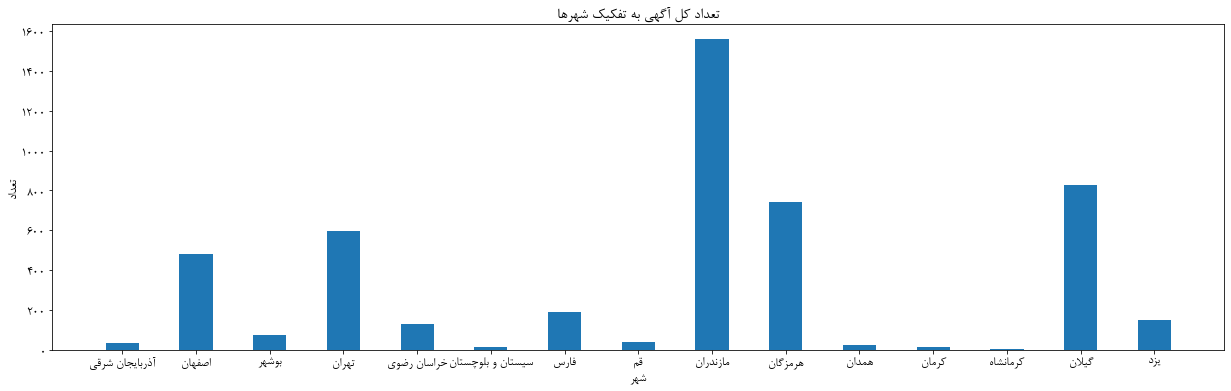

In [115]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display


plt.rcParams['font.size'] = 13.5
plt.figure(figsize=(21,6))
plt.bar(count_city_agg_df.index.map(lambda x : get_display(arabic_reshaper.reshape(x))),count_city_agg_df.city,width=0.45)
plt.xlabel(get_display(arabic_reshaper.reshape('شهر')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد')))
plt.title(get_display(arabic_reshaper.reshape('تعداد کل آگهی به تفکیک شهرها')))
plt.show()